In [1]:
import coiled

import dask
from dask.distributed import Client

In [2]:
ENV = "label-maker-dask-env"
# coiled.delete_software_environment(ENV)
# coiled.create_software_environment(
#    name=ENV,
#    pip=[
#         "dask[complete]",
#         "xarray==0.15.1",
#         "toolz",
#         "numpy",
#         "requests",
#         "mercantile",
#         "rasterio",
#         "shapely",
#         "fiona",
#         "boto3",
#         "rio-tiler",
#         "git+https://github.com/developmentseed/label-maker-dask.git"
#     ],
#     conda={"channels": ["conda-forge"], "dependencies": ["python==3.8.10"]},
#     force_rebuild=True
# )

In [3]:
# cluster = coiled.Cluster(name="drewbo-a0285f7e-2")
cluster = coiled.Cluster(
    n_workers=4,
    software=ENV,
    worker_cpu=1,
    worker_memory="8 GiB",
    backend_options=dict(region="us-east-1")
)

Output()

Created FW rules: coiled-dask-drewbo-53046-firewall
Created scheduler VM: coiled-dask-drewbo-53046-scheduler (type: t3.medium, ip: ['44.195.81.47'])


In [4]:
client = Client(cluster)
client.dashboard_link

'http://44.195.81.47:8787'

In [5]:
from label_maker_dask import LabelMakerJob
lmj = LabelMakerJob(
    zoom=15,
    bounds=[-9.1790771484375,
              38.70828560650091, -9.119510650634766,
              38.75408327579141],
    classes=[
        { "name": "Roads", "filter": ["has", "highway"] },
        { "name": "Buildings", "filter": ["has", "building"] }
      ],
    imagery="http://a.tiles.mapbox.com/v4/mapbox.satellite/{z}/{x}/{y}.jpg?access_token=TOKEN",
    ml_type="classification",
    label_source="https://qa-tiles-server-dev.ds.io/services/z17/tiles/{z}/{x}/{y}.pbf"
)

Sample graph


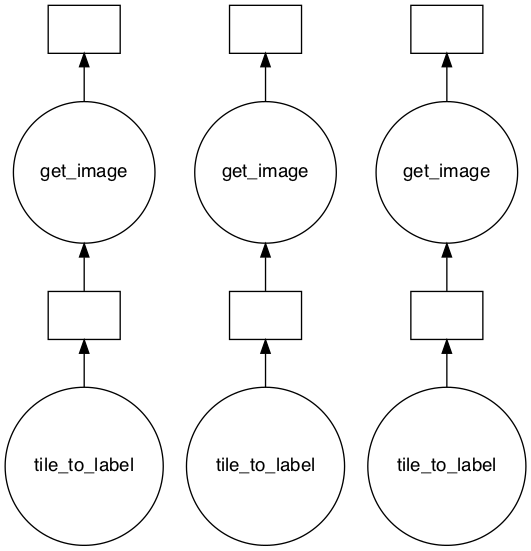

In [6]:
lmj.build_job()

In [ ]:
lmj.tasks

In [7]:
lmj.execute_job()

KeyboardInterrupt: 

In [ ]:
lmj.results[12].show()